In [6]:
import cv2
# https://inhovation97.tistory.com/56
import matplotlib.pyplot as plt
from matplotlib import gridspec
from tqdm import tqdm
import numpy as np

load image

In [7]:
image = cv2.imread('image01_small3.jpg')
image = image[:,:,::-1] # BGR -> RGB
width = len(image[0,:,0]) 
height = len(image[:,0,0]) 

load pre-defined patch

In [8]:
for i in range(3):

    #load the patch image.
    globals()["patch{}".format(i + 1)] = cv2.imread('patch' + str(i + 1) + '_small3.jpg')[:,:,::-1] # BGR -> RGB

    #inverse the patch.
    globals()["patch_inversed{}".format(i + 1)] = globals()["patch" + str(i + 1)][:,::-1,:] #x inversed

    #normalize the patch.
    globals()["patch_inversed" + str(i + 1)] = globals()["patch_inversed" + str(i + 1)].astype('float64') - 128

    #define convolution map.
    globals()["convolution_map_rgb{}".format(i + 1)] = image.copy()

    #change datatype to prevent overflow.
    globals()["convolution_map_rgb" + str(i + 1)] = globals()["convolution_map_rgb" + str(i + 1)].astype('float64')

do convolution.

In [9]:
for p in range(3):
    patch_width = len(globals()['patch' + str(p + 1)][0,:,0]) 
    patch_height = len(globals()['patch' + str(p + 1)][:,0,0])

    #https://stackoverflow.com/questions/43391205/add-padding-to-images-to-get-them-into-the-same-shape
    #do padding for patch size.
    #normalize by subtracting 128.
    globals()["image{}".format(p + 1)] = cv2.copyMakeBorder(src = image.copy(), top = int(patch_height/2), bottom = int(patch_height/2), left = int(patch_width/2), right = int(patch_width/2), borderType = cv2.BORDER_CONSTANT, value= [0, 0, 0]).astype('float64') - 128

    #do normalization for patch and the original image.

    #do convolution.
    for img_y in tqdm(range(height)):
        for img_x in range(width):
            for rgb in range(3):
                globals()["convolution_map_rgb" + str(p + 1)][img_y, img_x, rgb] = 0
                for patch_y in range(patch_height):
                    for patch_x in range(patch_width):
                        globals()["convolution_map_rgb" + str(p + 1)][img_y, img_x, rgb] +=  globals()["patch_inversed" + str(p + 1)][patch_y, patch_x, rgb].astype('float64') * globals()["image" + str(p + 1)][img_y + patch_y, img_x + patch_x, rgb].astype('float64')

    #sum the convolution values.
    globals()["convolution_map{}".format(p + 1)] = globals()["convolution_map_rgb" + str(p + 1)].sum(axis = 2)

    

100%|██████████| 170/170 [00:39<00:00,  4.30it/s]


find the bounding box

In [10]:
####################
#testing
for p in range(3):
    #sum the convolution values.
    globals()["convolution_map{}".format(p + 1)] = globals()["convolution_map_rgb" + str(p + 1)].sum(axis = 2)
print(globals()["convolution_map_rgb1"].shape)
print(globals()["convolution_map1"].shape)

(170, 120, 3)
(170, 120)


print the result

In [11]:
fig = plt.figure(dpi=200, tight_layout=True)
gs = gridspec.GridSpec(nrows = 3, ncols = 4,width_ratios = [8, 1, 8, 8])

<Figure size 1280x960 with 0 Axes>

[]

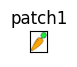

In [12]:
#patch1
# ax0 = plt.subplot(gs[0])
# ax0.imshow(globals()['patch1'])
# ax0.set_title('patch1')
# ax0.set_xticks([])
# ax0.set_yticks([])

ax1 = plt.subplot(gs[1])
ax1.imshow(globals()['patch1'])
ax1.set_title('patch1')
ax1.set_xticks([])
ax1.set_yticks([])

show convolution results.

[]

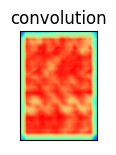

In [13]:
ax2 = plt.subplot(gs[2])
#ax2.imshow(image)
ax2.imshow(globals()["convolution_map1"], cmap="rainbow", interpolation= 'bilinear')
ax2.set_title('convolution')
#cbarax = fig.add_subplot(gs[2])
ax2.set_xticks([])
ax2.set_yticks([])


60,83


ValueError: x and y must have same first dimension, but have shapes (0,) and (20,)

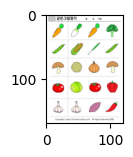

In [37]:
ax3 = plt.subplot(gs[3])


ax3.imshow(image)

globals()["convolution_map1_normalized"] = globals()["convolution_map1"] + globals()["convolution_map1"].min()
globals()["convolution_map1_normalized"] /= globals()["convolution_map1_normalized"].max()
for i in range (globals()["convolution_map1_normalized"].shape[0]):
    for j in range (globals()["convolution_map1_normalized"].shape[1]):
        if globals()["convolution_map1_normalized"][i,j] >= 0.98:
            print(str(i) + "," + str(j))
            y_range_bottom = np.full((patch_height), i - patch_height/2)
            y_range_top = np.full((patch_height), i + patch_height/2)
            x_range_left = np.full((patch_width), j - patch_width/2)
            x_range_right = np.full((patch_width), j + patch_width/2)

            y_line = np.arange(i - patch_height/2, i + patch_height/2, patch_height/20, dtype = int)
            x_line = np.arange(j - patch_width/2, i + patch_width/2, patch_width/20, dtype = int)

            ax3.plot(x_line, y_range_bottom, linewidth = 2, color = 'red')
            ax3.plot(x_line, y_range_top, linewidth = 2, color = 'red')
            ax3.plot(y_line, x_range_left, linewidth = 2, color = 'red')
            ax3.plot(y_line, x_range_right, linewidth = 2, color = 'red')

ax3.set_title('results')
ax3.set_xticks([])
ax3.set_yticks([])

patch2

[]

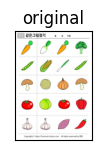

In [15]:
ax4 = plt.subplot(gs[4])
ax4.imshow(image)
ax4.set_title('original')
ax4.set_xticks([])
ax4.set_yticks([])

[]

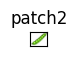

In [16]:
ax5 = plt.subplot(gs[5])
ax5.imshow(globals()['patch2'])
ax5.set_title('patch2')
ax5.set_xticks([])
ax5.set_yticks([])

[]

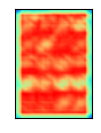

In [17]:
ax6 = plt.subplot(gs[6])
ax6.imshow(globals()["convolution_map2"], cmap="rainbow", interpolation= 'bilinear')
ax6.set_xticks([])
ax6.set_yticks([])

[]

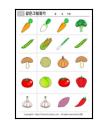

In [18]:
ax7 = plt.subplot(gs[7])
ax7.imshow(image)
ax7.set_xticks([])
ax7.set_yticks([])

patch3

[]

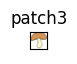

In [19]:
# ax8 = plt.subplot(gs[8])
# ax8.imshow(globals()['patch3'])
# ax8.set_title('patch3')
# ax8.set_xticks([])
# ax8.set_yticks([])

ax9 = plt.subplot(gs[9])
ax9.imshow(globals()['patch3'])
ax9.set_title('patch3')
ax9.set_xticks([])
ax9.set_yticks([])

[]

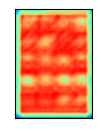

In [20]:
ax10 = plt.subplot(gs[10])
ax10.imshow(globals()["convolution_map3"], cmap="rainbow", interpolation= 'bilinear')
ax10.set_xticks([])
ax10.set_yticks([])

[]

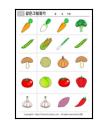

In [21]:
ax11 = plt.subplot(gs[11])
ax11.imshow(image)
ax11.set_xticks([])
ax11.set_yticks([])

In [22]:
plt.show()